# Start working on Dollars vs PLNs ML app


* Imports
* Use resnet34 and pytorch with ImageClassifier

In [1]:
# Use those to get autoreload and plots displayed
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from mllibs.imports import *
from mllibs.transforms import *
from mllibs.conv_learner import *
from mllibs.model import *
from mllibs.dataset import *
from mllibs.sgdr import *
from mllibs.plots import *

In [3]:
PATH = "../dataset/"
sz=224

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled


True

In [6]:
os.listdir(PATH)

['test', 'valid', 'models', 'train', 'tmp']

In [7]:
os.listdir(f'{PATH}valid')

['USD', 'PLN']

In [8]:
files = os.listdir(f'{PATH}valid/PLN')[:5]
files

['000048.jpg', '000197.jpg', '000246.jpg', '000291.jpg', '000350.jpg']

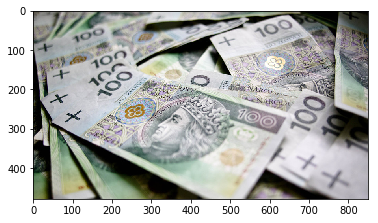

In [9]:
img = plt.imread(f'{PATH}valid/PLN/{files[3]}')
plt.imshow(img);

In [10]:
img.shape

(478, 850, 3)

In [11]:
img[:4,:4]

array([[[76, 73, 56],
        [77, 74, 59],
        [78, 76, 63],
        [78, 76, 64]],

       [[77, 74, 57],
        [78, 75, 60],
        [78, 76, 63],
        [79, 77, 65]],

       [[73, 70, 53],
        [75, 72, 57],
        [77, 73, 61],
        [79, 77, 65]],

       [[72, 69, 52],
        [75, 72, 57],
        [79, 75, 63],
        [81, 77, 66]]], dtype=uint8)

In [12]:
shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [22]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
print(data)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 6/6 [00:02<00:00,  2.27it/s]


epoch      trn_loss   val_loss   accuracy               
    0      0.904909   0.669665   0.621053  
    1      0.767967   0.590067   0.702632  



[array([0.59007]), 0.7026315833392897]

In [23]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [24]:
data.classes

['PLN', 'USD']

In [25]:
log_preds = learn.predict()
log_preds.shape

(380, 2)

In [27]:
log_preds[:10]

array([[-0.72732, -0.66011],
       [-0.51528, -0.90965],
       [-0.38129, -1.14878],
       [-1.21675, -0.35125],
       [-0.25482, -1.49191],
       [-1.52057, -0.24665],
       [-0.52329, -0.89788],
       [-0.26841, -1.44646],
       [-0.70387, -0.68254],
       [-1.4089 , -0.28026]], dtype=float32)

In [28]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [29]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [31]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [32]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


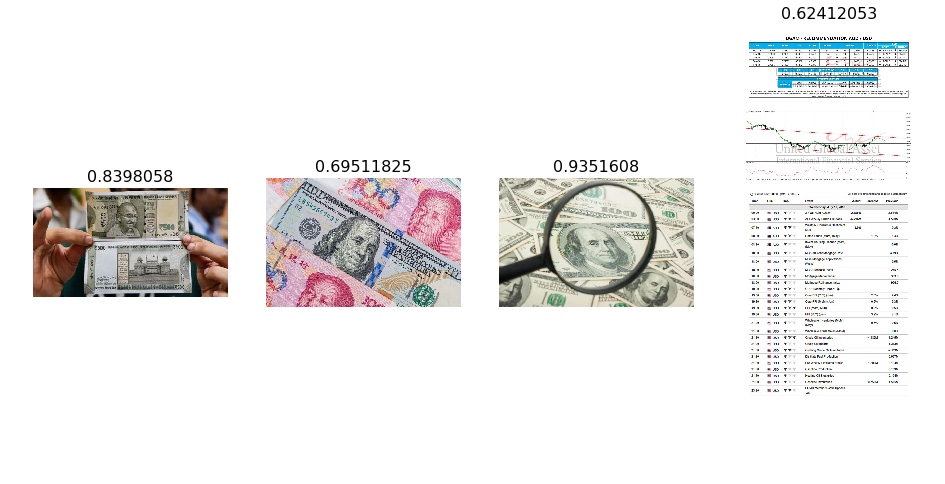

In [33]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")


Incorrectly classified


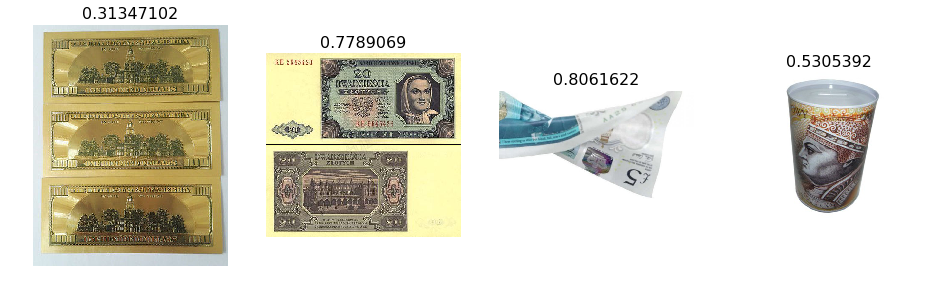

In [34]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")


In [35]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct PLN


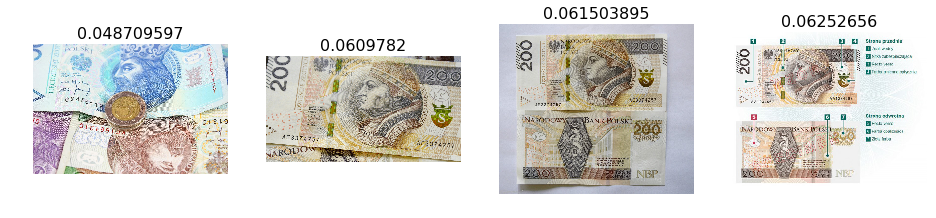

In [37]:
plot_val_with_title(most_by_correct(0, True), "Most correct PLN")

Most correct USD


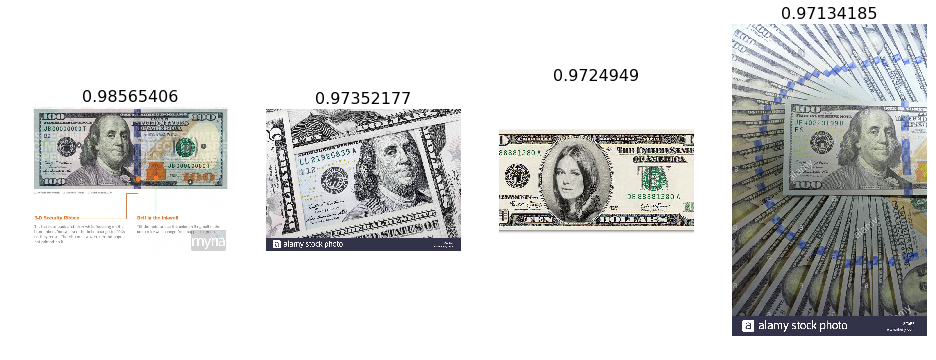

In [39]:
plot_val_with_title(most_by_correct(1, True), "Most correct USD")

Most incorrect PLN


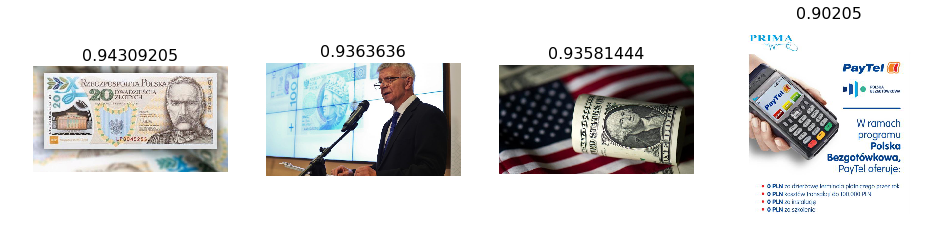

In [40]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect PLN")

Most incorrect USD


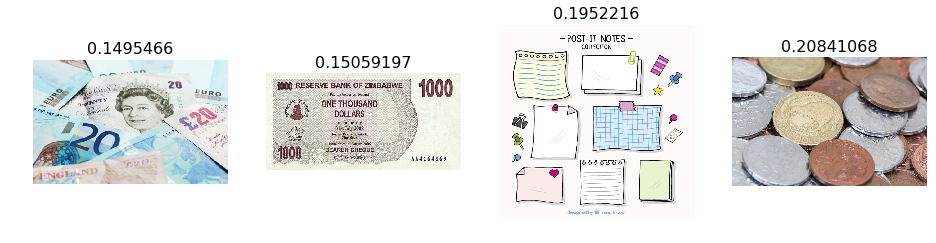

In [41]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect USD")

Most uncertain predictions


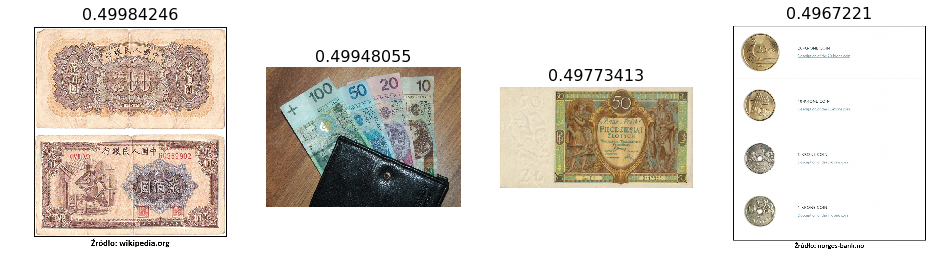

In [42]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

# THAT'S IT Basically

# USD VS PLN ML import antigravity way

### WORKING